## Introduction
The purpose of Assessment 0 is to explore our chosen application domain and find resources to enable this group to more easily complete Assessment 1 which is creating a binary classifier. We have chosen to explore the financial sector as our application domain and more spcifically, loan data. In this section, some exploratory data analysis is performed on a dataset of loan applications.

This dataset is sourced from Kaggle but originally it was taken from `LendingClub.com`. This is a website that connects borrowers and lenders. The features of this dataset are loan application details and the target variable is whether a borrower fully paid back their loan.



First, we import the necessary Python packages. Most of these packages are standard data science packages with one exception - `opendatasets`. This package allows the notebook to query Kaggle for a dataset. To do this, a Kaggle account was created and a Kaggle key generated. So that this download works, a JSON file containing a `username` and `key` field is needed in the same folder. As it is bad practice to put keys on GitHub, they are kept on a group member's local computer. When the notebook is run on that computer and there is no folder `loan-data`, the JSON file is retreived from Kaggle. As it will not always be the case that this same team member is running the notebook, a downloaded version of the dataset has been included for convenience. 

In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from IPython.display import display
import opendatasets as od

Skipping, found downloaded files in ".\loan-data" (use force=True to force download)


In [ ]:
od.download("https://www.kaggle.com/datasets/itssuru/loan-data") 

We explain the names of the columns in the dataset and below we display the dataset. Note that the `fully.paid` column is the targer variable for the upcoming binary classifier and all the other variables are the features.

| Column Name              | Full Column Name | Explanation |
| :---------------- | :---------------- | :------: |
| credit.policy   | Credit Policy   |   1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.   |
| purpose | Purpose           |   The purpose of the loan.   |
| int.rate | Interest Rate    |  The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.   |
| installment | Installment |  The monthly installments owed by the borrower if the loan is funded.   |
| log.annual.in | Log Annual Income |  The natural log of the self-reported annual income of the borrower.
| dti | Debt-to-Income Ratio |  The debt-to-income ratio of the borrower (amount of debt divided by annual income). |
| fico | FICO Score | The FICO credit score of the borrower. |
| days.with.cr.line | Days with Credit Line |  The number of days the borrower has had a credit line.   |
| revol.bal | Revolving Balance |  The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).   |
| revol.util | Revolving Utilisation Score |  The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). |
| inq.last.6mths | Inquiries In Last 6 Months |  The borrower's number of inquiries by creditors in the last 6 months. |
| delin.2yrs | Delinqincies in 2 Years|  The number of times the borrower had been 30+ days past due on a payment in the past 2 years.   |
| pub.rec.policy | Public Records |  The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).   |
| not.fully.paid | Not Fully Paid |  1 if the borrower has not fully paid the loan back and 0 otherwise.   |


In [142]:
loans_data_set_path = os.getcwd() + os.sep + "loan-data" + os.sep + "loan_data.csv"
loans_df = pd.read_csv(loans_data_set_path)
numeric_loans_df = loans_df._get_numeric_data()
display(loans_df)

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

We can see below that all the values in the dataset are valid and therefore there is no data cleaning needed.

In [143]:
print(loans_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


Below is the summary statistics table. We have also included some kernel density estimates to visualise these distributions.

credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.375619e+04    29.014417   
min     612.000000         178.958333  0.000000e+00     0.000000   
25%     682.000000        2820.000000  3.187000e+03    22.600000   
50%     707.000000        4139.958333  8.596000e+03    46.300000   
75%     737.000000        5730.000000  1.824950e+04    70.900000   
max     827.000000       17639.958330  1.207359e+06   119.000000   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

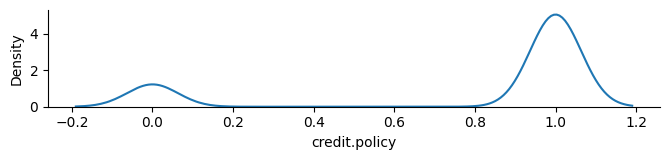

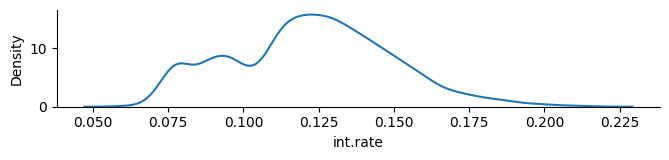

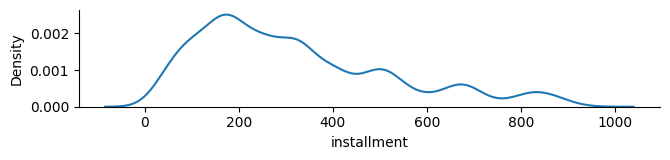

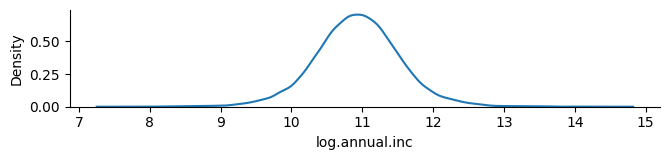

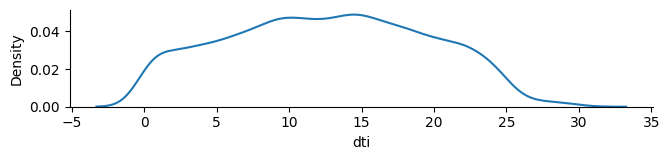

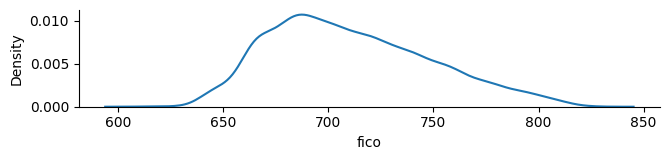

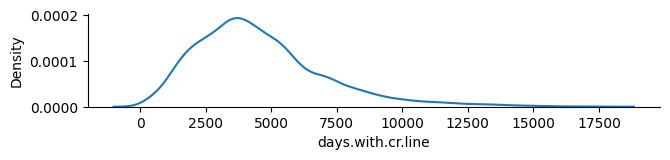

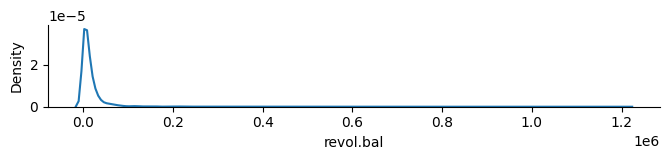

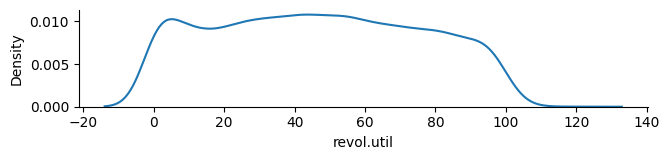

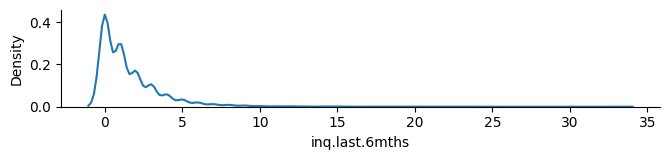

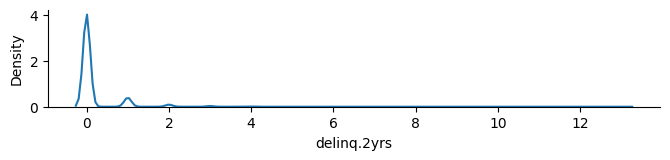

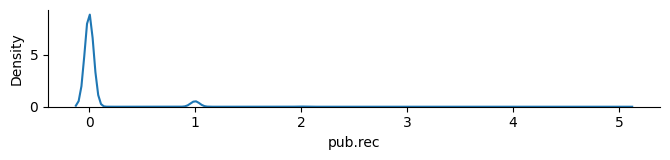

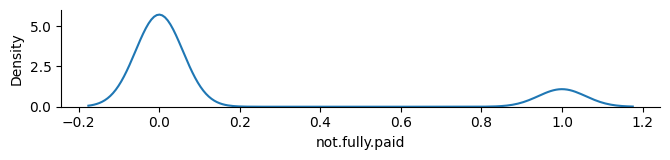

In [189]:
display(loans_df.describe())

for i in list(loans_df):
    if pd.api.types.is_numeric_dtype(loans_df[i]):
        g = sns.FacetGrid(loans_df, height=1.7, aspect=4,)
        g.map(sns.kdeplot, i)

We take the logarithms of `dti` and `revol.util` columns so that the data looks to be distributed more like a normal distribution. Then we look at the above summary statistics and kernel density estimates again.

In [193]:
loans_df["dti"] = loans_df["dti"].apply(lambda x: np.log(x))
loans_df["revol.util"] = loans_df["revol.util"].apply(lambda x: np.log(x))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26908\1951444566.py:1: RuntimeWarning: invalid value encountered in log
  loans_df["dti"] = loans_df["dti"].apply(lambda x: np.log(x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26908\1951444566.py:1: RuntimeWarning: divide by zero encountered in log
  loans_df["dti"] = loans_df["dti"].apply(lambda x: np.log(x))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26908\1951444566.py:2: RuntimeWarning: invalid value encountered in log
  loans_df["revol.util"] = loans_df["revol.util"].apply(lambda x: np.log(x))


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9168.000000   
mean        0.804970     0.122640   319.089413       10.932117         -inf   
std         0.396245     0.026847   207.071301        0.614813          NaN   
min         0.000000     0.060000    15.670000        7.547502         -inf   
25%         1.000000     0.103900   163.770000       10.558414     0.731498   
50%         1.000000     0.122100   268.950000       10.928884     0.946697   
75%         1.000000     0.140700   432.762500       11.291293     1.065201   
max         1.000000     0.216400   940.140000       14.528354     1.223735   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  8948.000000   
mean    710.846314        4560.767197  1.691396e+04     0.204612   
std      37.970537        2496.930377  3.375619e+04     0.342149   
min     612.000000         178.958333  0.000000e+00    -3.533955   
25%     682.000000        2820.000000  3.187000e+03     0.178989   
50%     707.000000        4139.958333  8.596000e+03     0.307811   
75%     737.000000        5730.000000  1.824950e+04     0.374862   
max     827.000000       17639.958330  1.207359e+06     0.447411   

       inq.last.6mths  delinq.2yrs      pub.rec  not.fully.paid  
count     9578.000000  9578.000000  9578.000000     9578.000000  
mean         1.577469     0.163708     0.062122        0.160054  
std          2.200245     0.546215     0.262126        0.366676  
min          0.000000     0.000000     0.000000        0.000000  
25%          0.000000     0.000000     0.000000        0.000000  
50%          1.000000     0.000000     0.000000        0.000000  
75%          2.000000     0.000000     0.000000        0.000000  
max         33.000000    13.000000     5.000000        1.000000

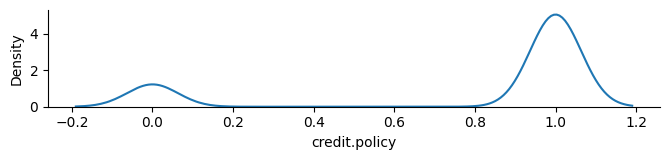

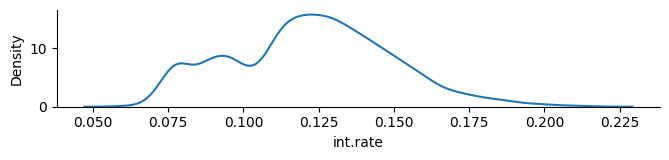

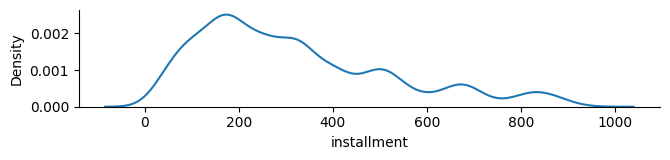

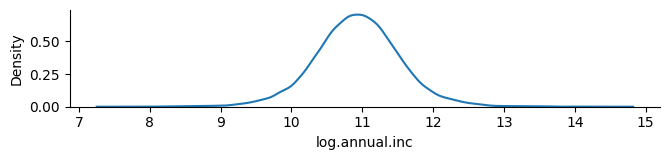

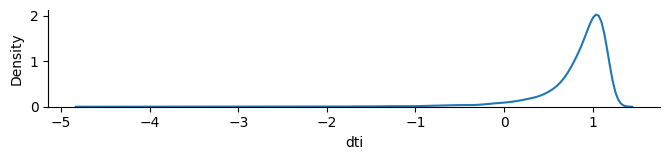

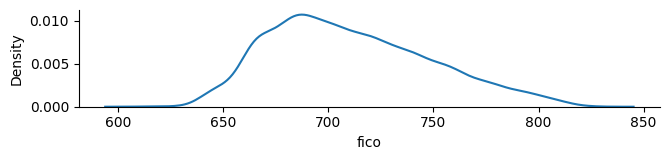

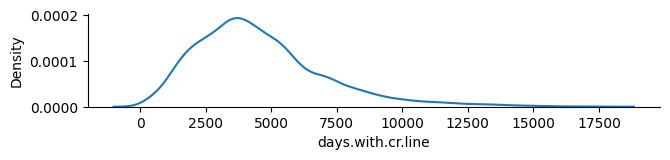

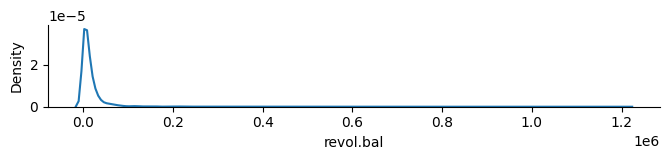

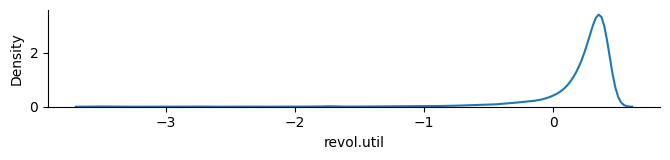

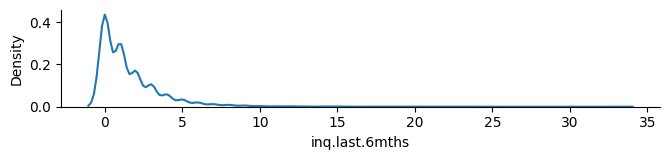

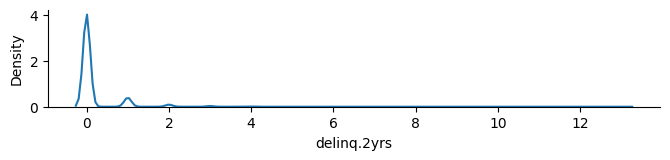

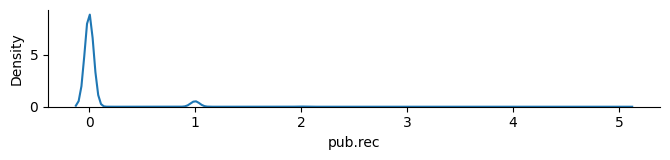

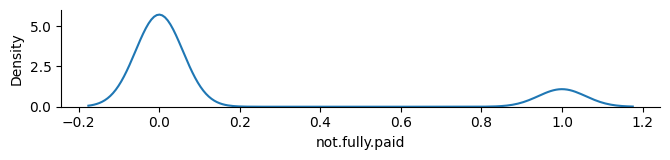

In [194]:
display(loans_df.describe())

for i in list(loans_df):
    if pd.api.types.is_numeric_dtype(loans_df[i]):
        g = sns.FacetGrid(loans_df, height=1.7, aspect=4,)
        g.map(sns.kdeplot, i)

Below we try to see if there are any relationships between any of the two features by creating a scatter plot `PairGrid`.

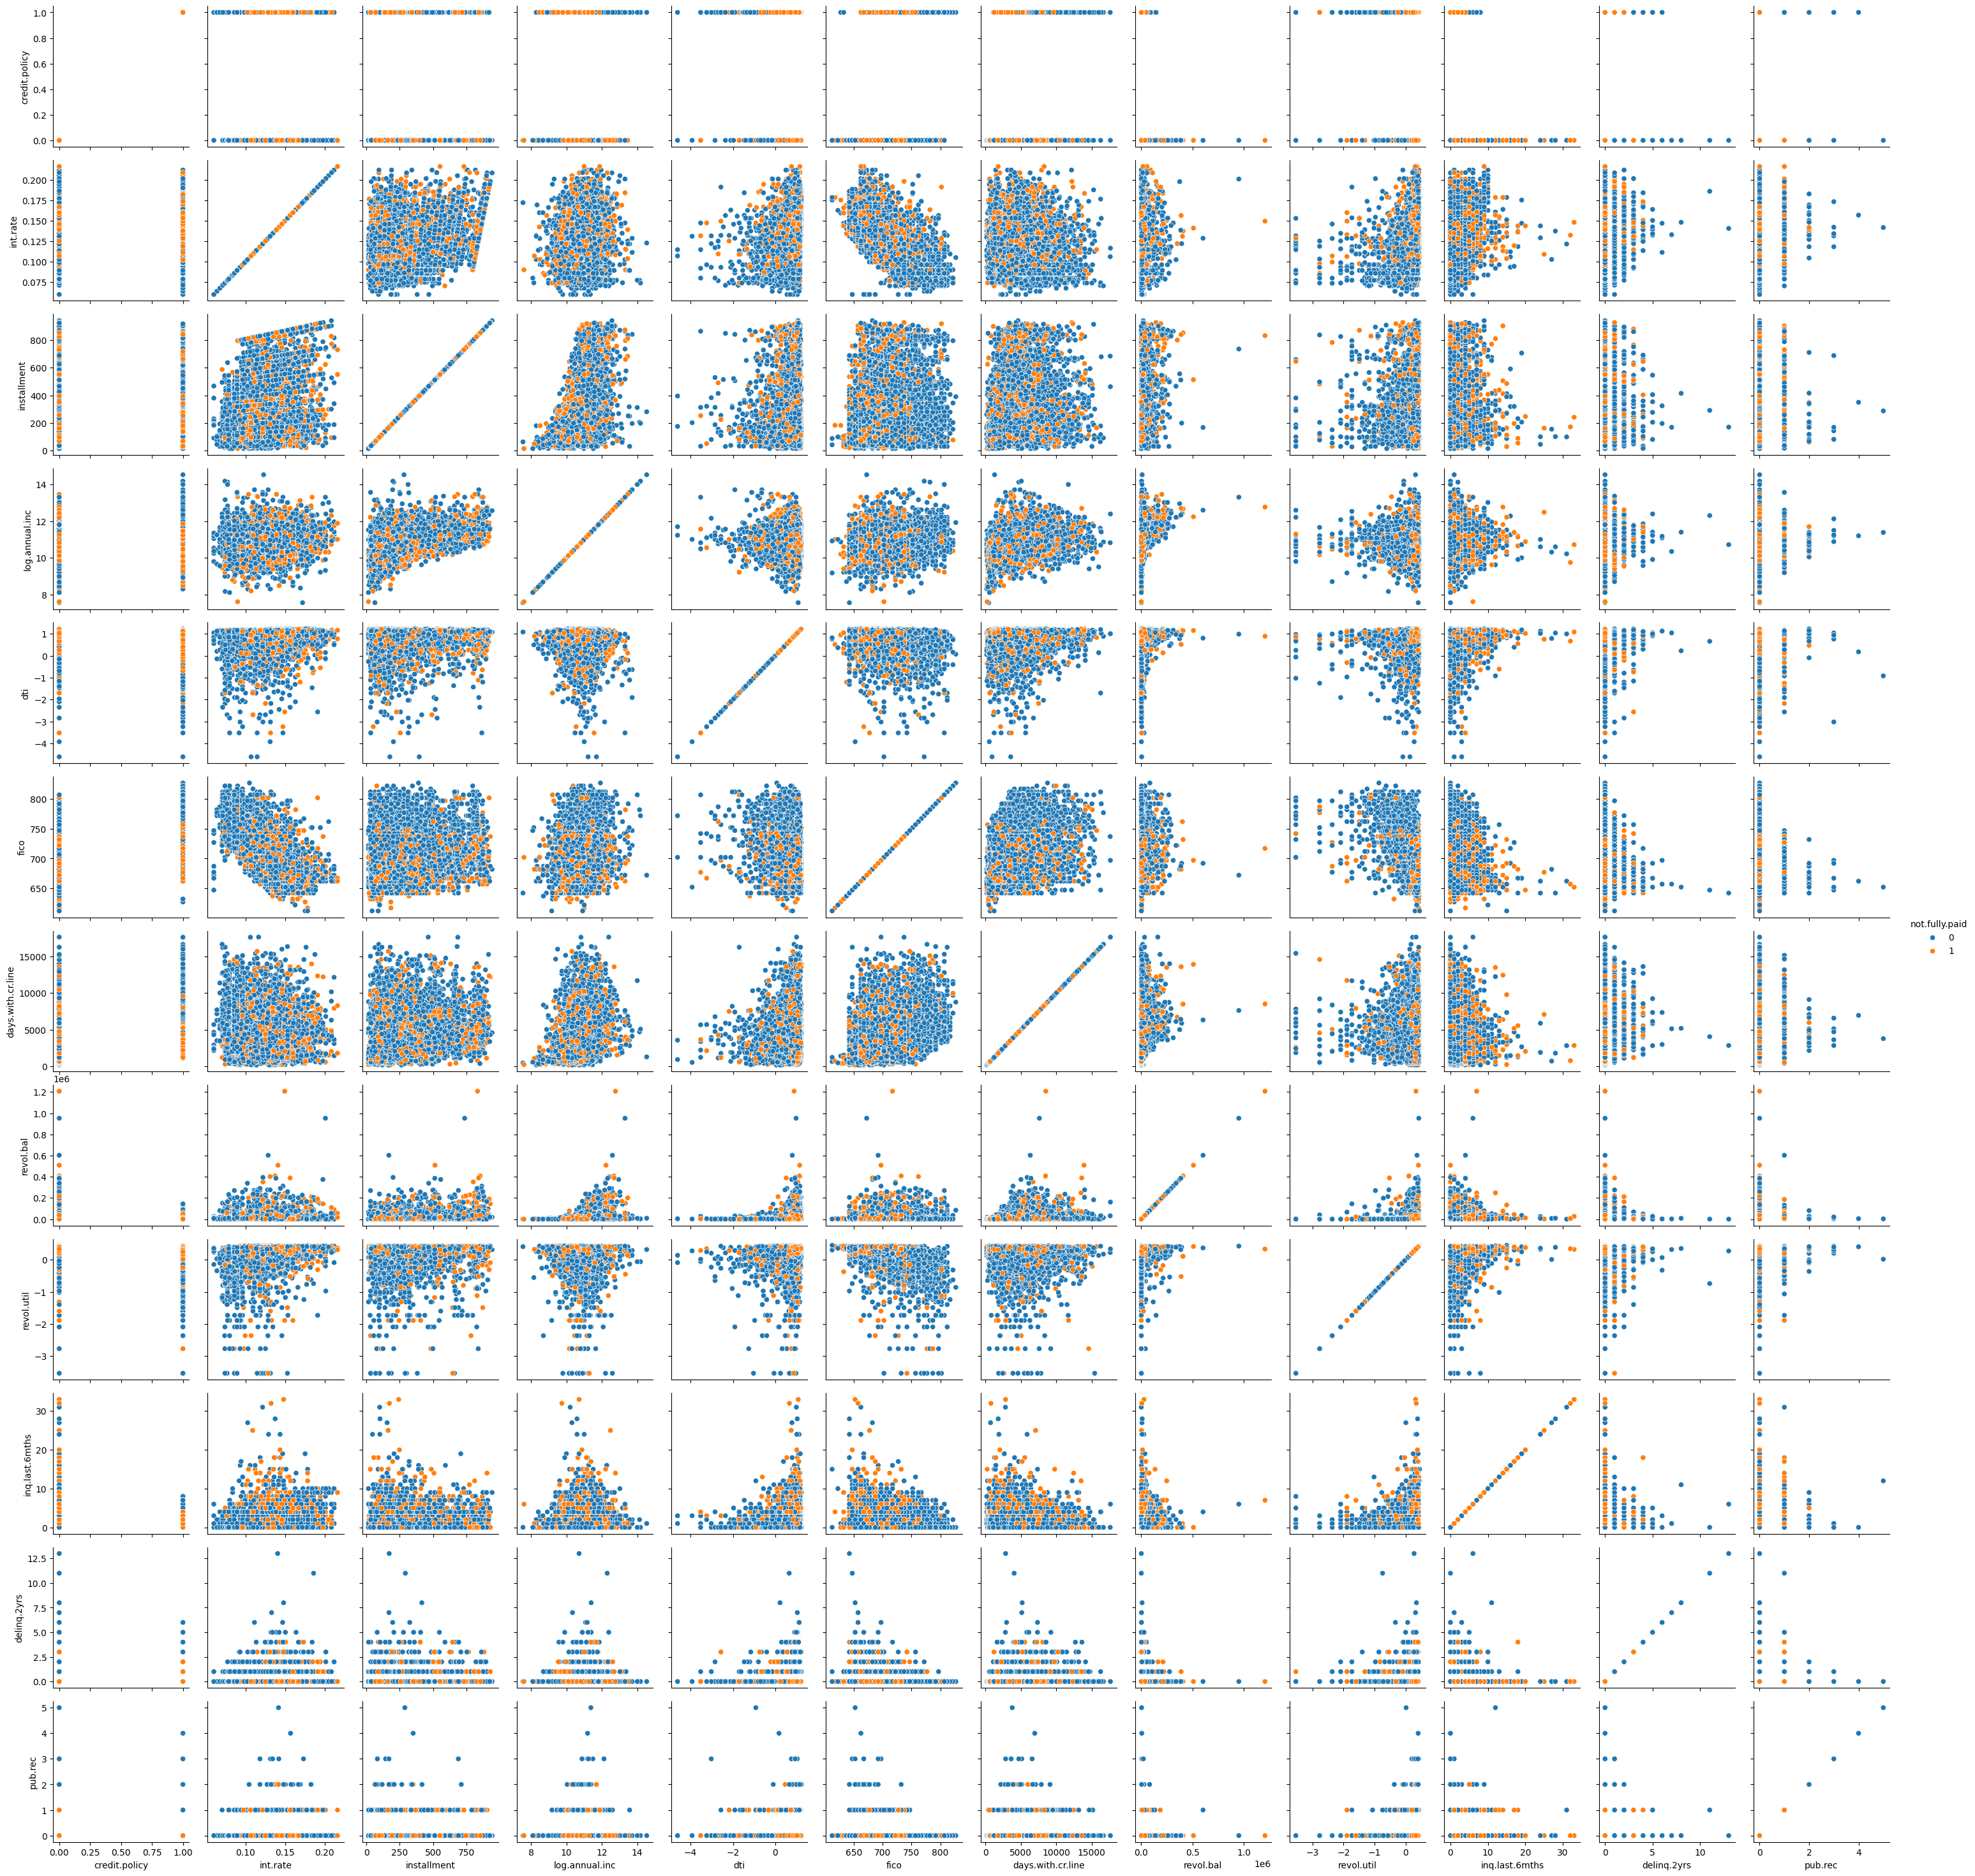

In [195]:
g = sns.PairGrid(loans_df, hue="not.fully.paid")
g.map(sns.scatterplot)
g.add_legend()

As dimension reduction is important, we would like to see if there are any features that are highly correlated in order to remove some. This is done by creating a heatmap that shows the correlation coefficients between all the features.

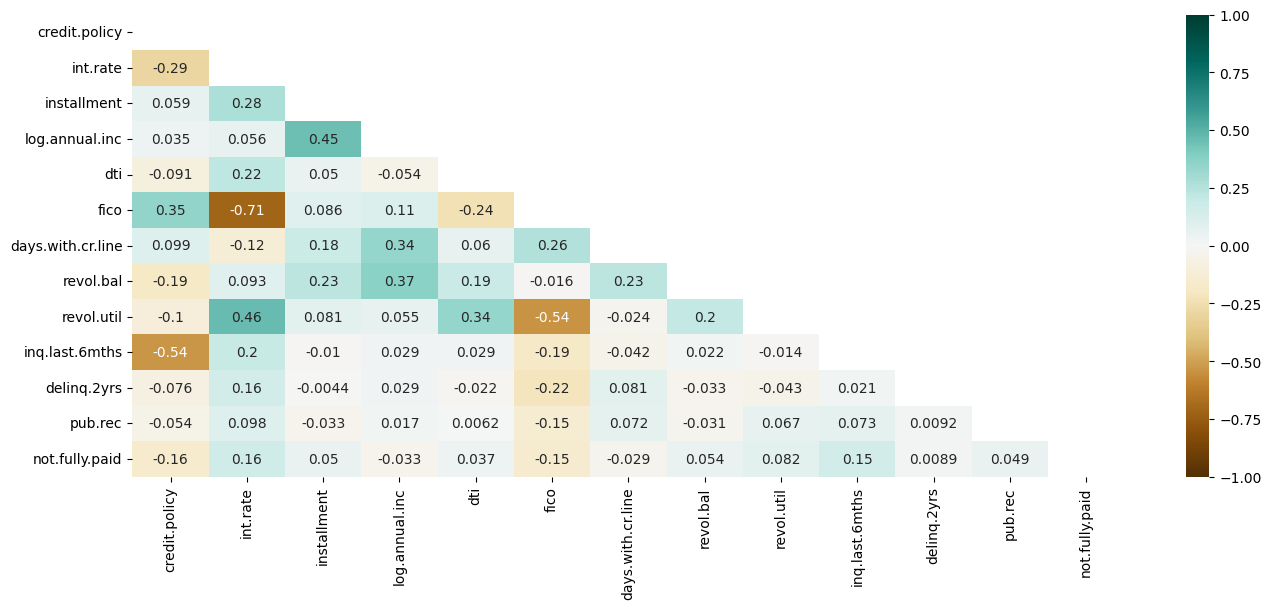

In [196]:
plt.figure(figsize=(16, 6))

mask = np.triu(np.ones_like(numeric_loans_df.corr(), dtype=np.bool))
heatmap = sns.heatmap(numeric_loans_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

As the one column of categorical data is the purpose of each loan, it might be interesting to ask if the data should be disaggregated between these loan purposes. This might tell us whether splitting the data between these loan purposes makes a diffence in the credit 

<Figure size 1600x600 with 0 Axes>

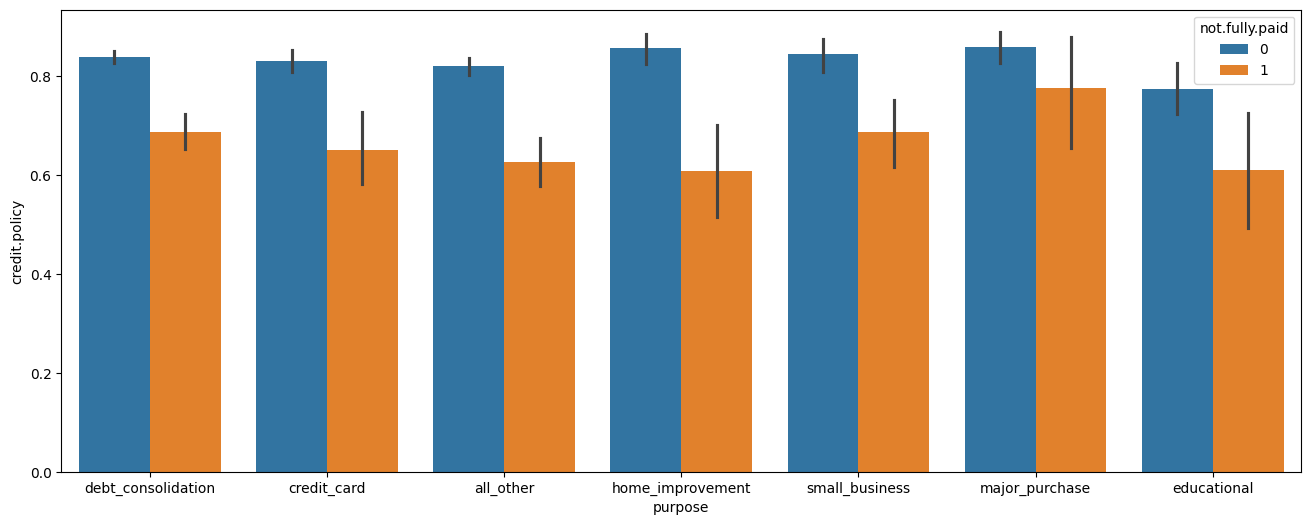

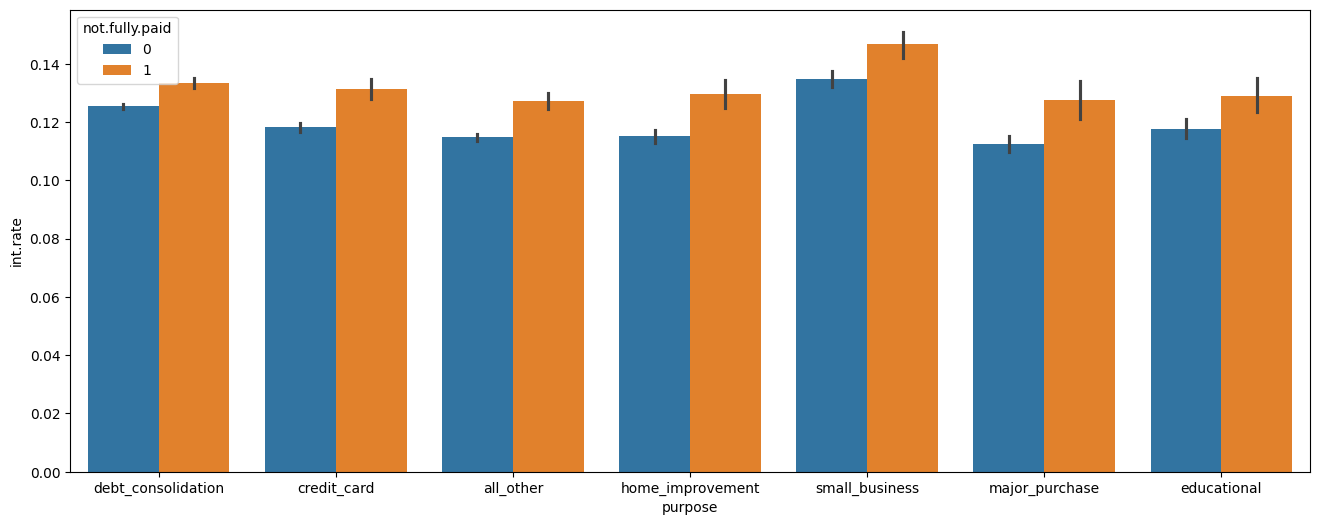

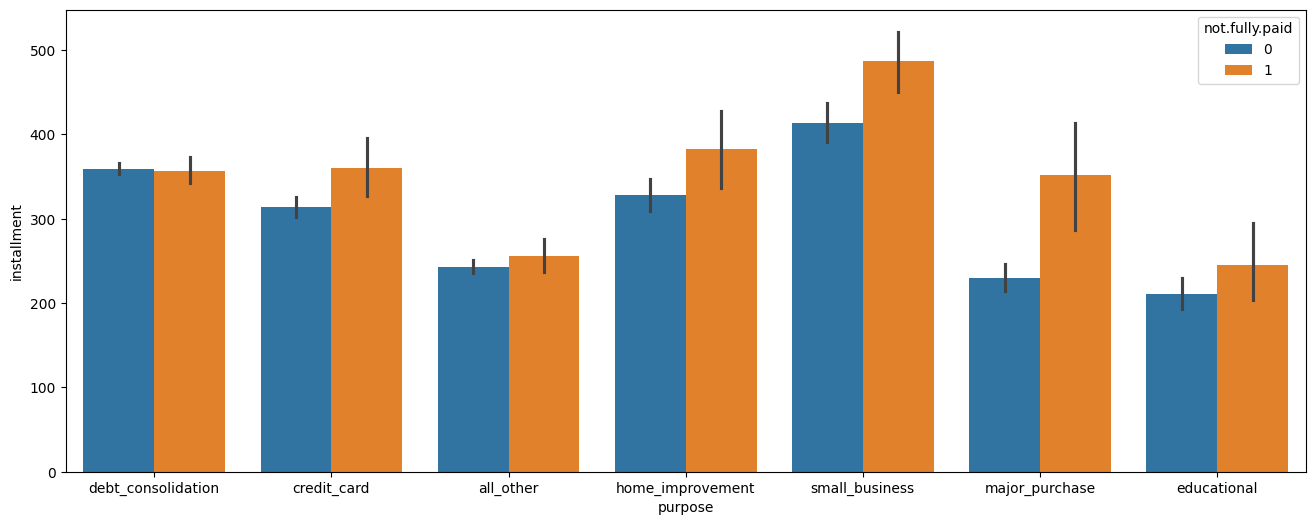

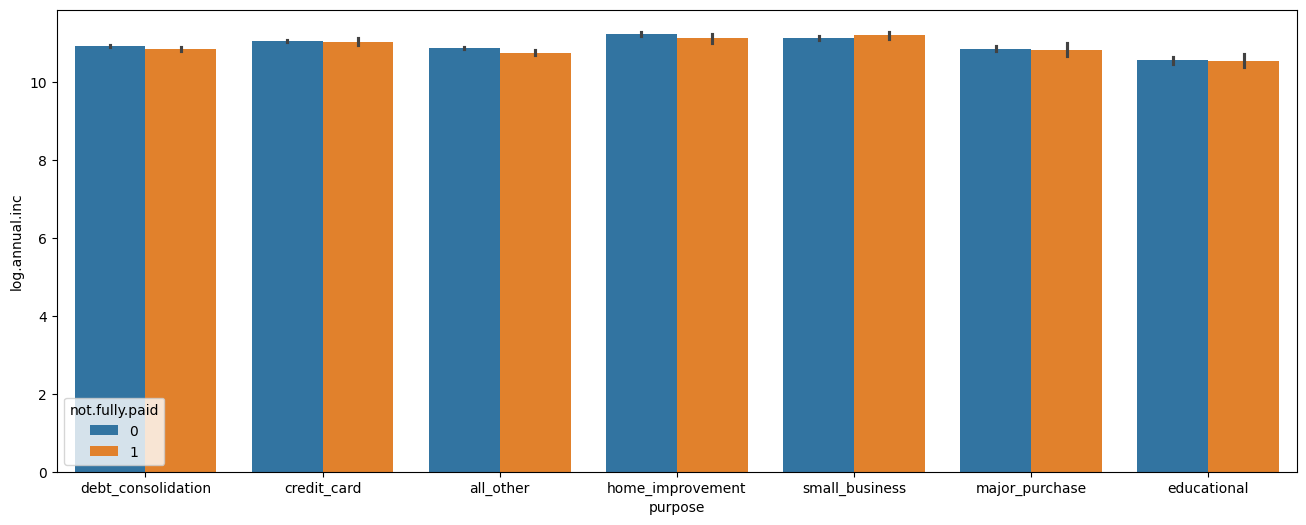

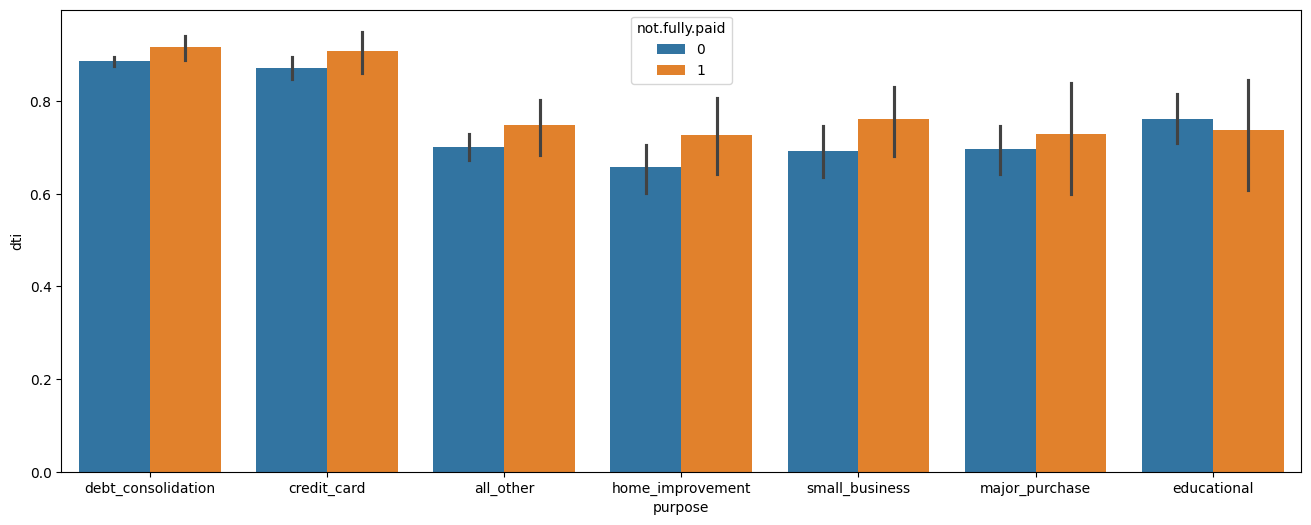

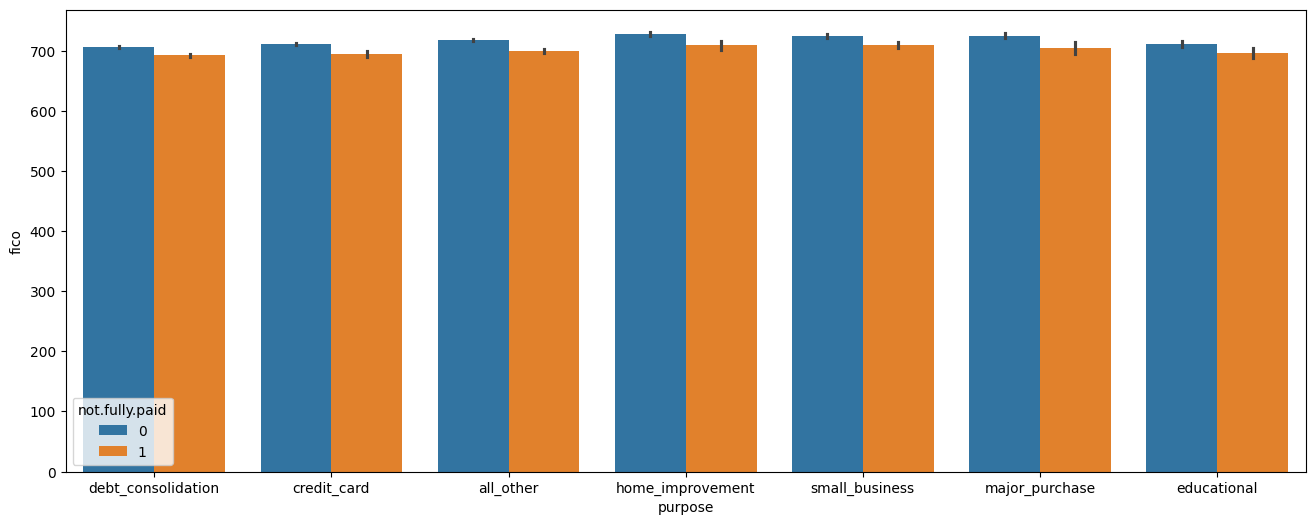

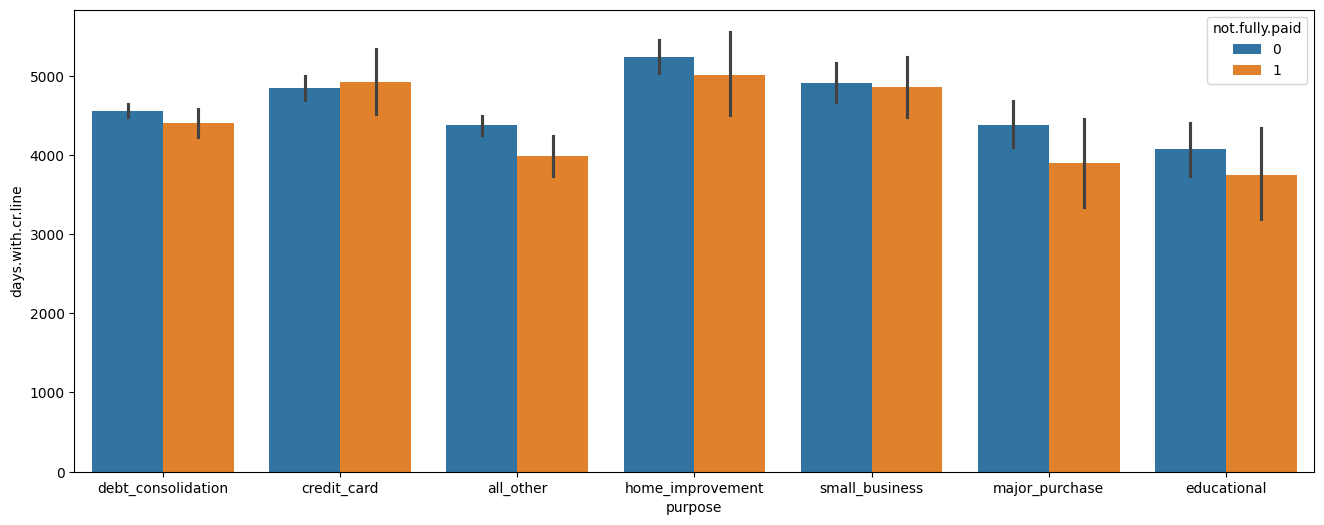

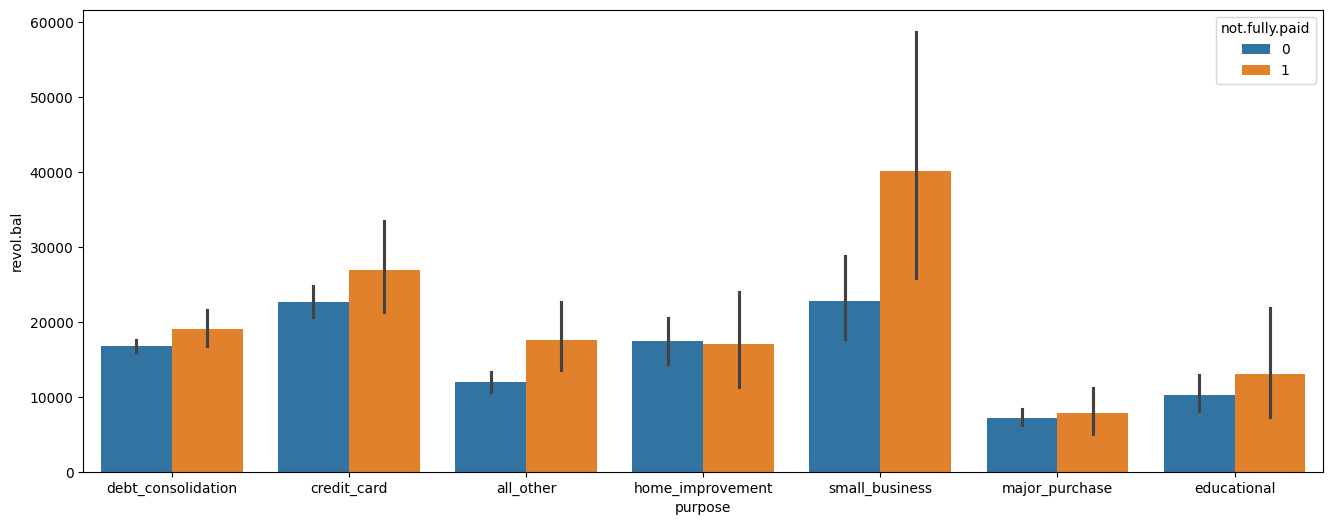

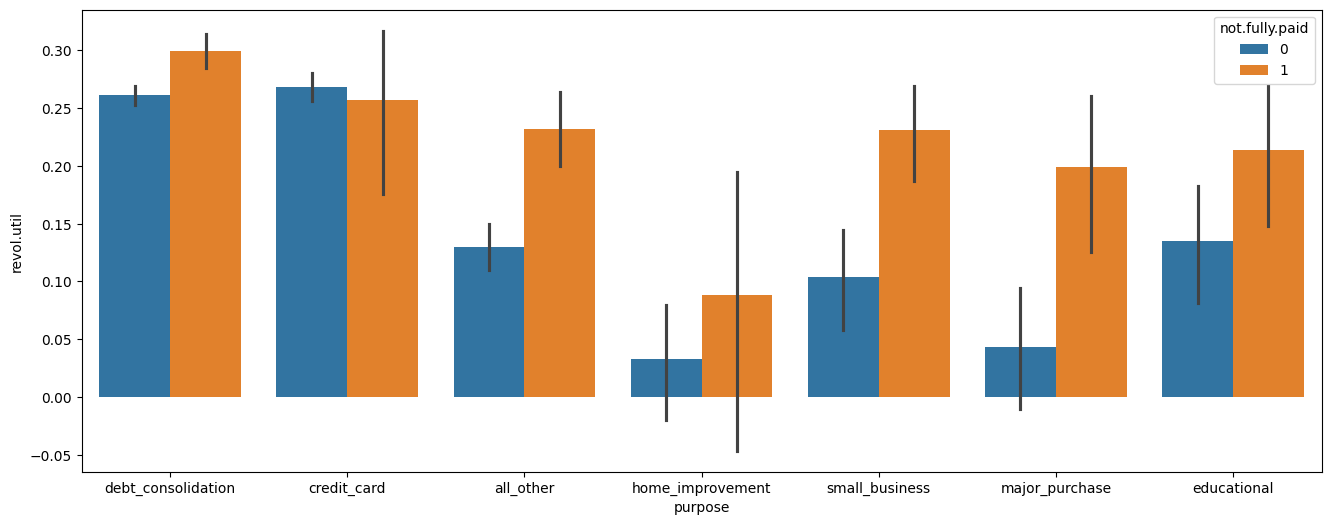

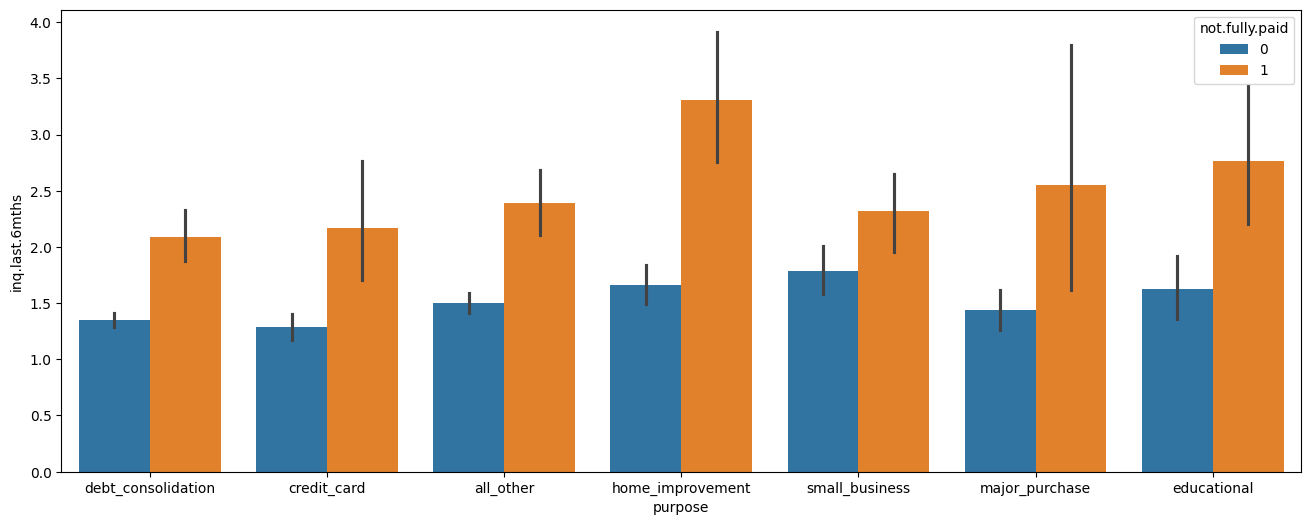

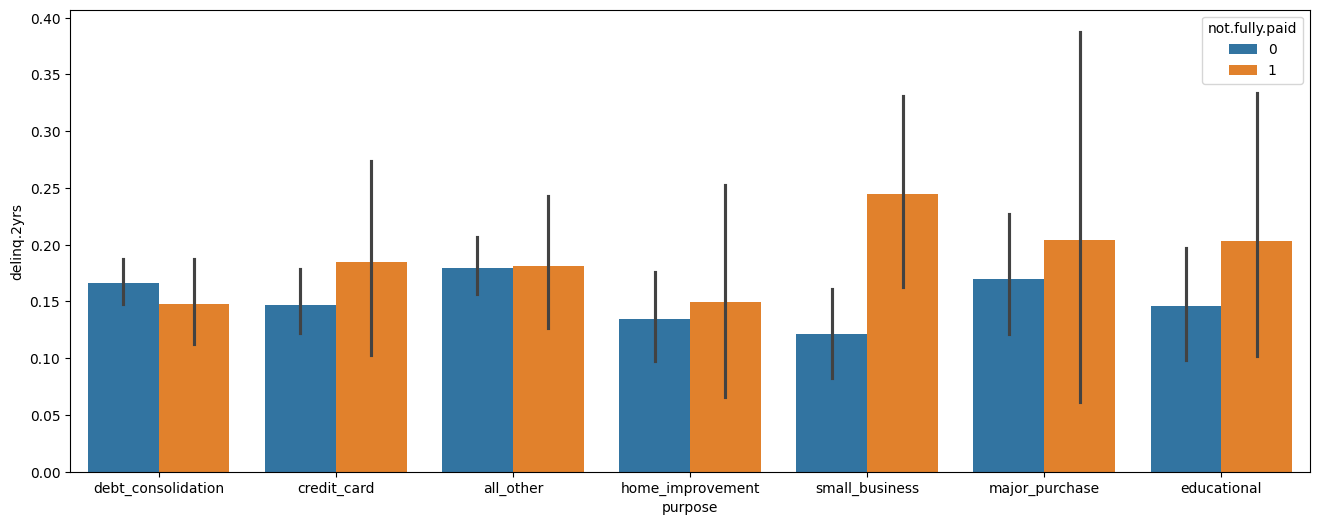

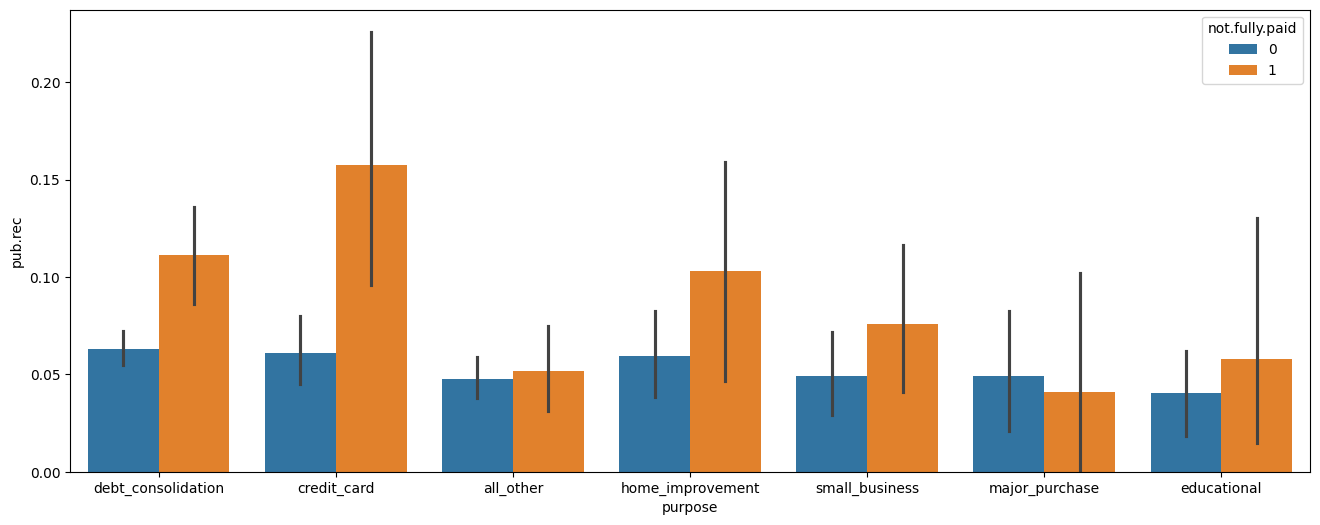

In [201]:
plt.figure(figsize=(16, 6))
for i in list(loans_df):
    if i not in ("purpose", "not.fully.paid"):
        plt.figure(figsize=(16, 6))
        sns.barplot(loans_df, x="purpose", y=i, hue="not.fully.paid")

From these bar charts, it seems as thought most features have a noticeable difference depending on whether or not `not.fully.paid` is true or not. The noticeable exceptions being `log.annual.inc` and `fico`. This might suggest that these two `features` are not useful in determining whether `not.fully.paid` is a 0 or 1.